In [1]:
import numpy as np
import pandas as pd
storage_options = {'User-Agent': 'Mozilla/5.0'}
url = "https://www.fraserinstitute.org/sites/default/files/economic-freedom-of-north-america-2022-for-website-allgovs.xlsx"
GDP = pd.read_csv("StateGDP.csv")
efw = pd.read_excel(url, storage_options=storage_options, sheet_name=None)
codes = pd.read_csv("taxitemcodesanddescriptions.csv", header = [0], index_col = [0])

In [2]:
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

fips_dict = {
 '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR',
 '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE',
 '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID',
 '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS',
 '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD',
 '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS',
 '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV',
 '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY',
 '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK',
 '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC',
 '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT',
 '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV',
 '55': 'WI', '56': 'WY'}
# '60': 'AS', '66': 'GU',
#  '69': 'MP', '72': 'PR', '78': 'VI'}
state_df = pd.DataFrame(state_dict, index = ["Abbr"]).T
fips_df = pd.DataFrame(fips_dict, index = ["State"]).T
state_names, state_abbrev = state_df.index, list(state_df["Abbr"].values)
state_df.T# state_abbrev

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Abbr,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY


In [8]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, 
                start, 
                end = datetime.datetime.today(), 
                freq = "M"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(
                val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [9]:
data_codes  = {state: f"{state}POP" for state in state_dict.values()}
# Select start and end dates
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
pop = gather_data(data_codes = data_codes, start = start, end = end, freq = "A")

In [12]:
pop_panel = pop.reset_index()
pop_panel["DATE"] = pop_panel["DATE"].astype(str).str[:4].astype(int)
pop_panel = pop_panel.melt(id_vars=["DATE"], 
        var_name="State", 
        value_name="Population").set_index(["State", "DATE"]).round(2)

In [4]:
years = [1985,
 1990,
 1995,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]
efw = efw["Overall-scores(allgovs)"].dropna(subset = "Unnamed: 104").rename(columns = {"Overall allg Scores":"State"})
panel = efw[efw["Unnamed: 104"].str.contains(", US")]
panel = panel[["State"] + years]
panel["State"] = panel["State"].apply(lambda x:state_dict[x])
panel = panel.melt(id_vars=["State"], 
        var_name="Year", 
        value_name="EFW").set_index(["State", "Year"]).round(2)
panel

,,EFW
State,Year,
AL,1985,8.22
AK,1985,8.04
AZ,1985,8.25
AR,1985,8.20
CA,1985,8.07
...,...,...
VA,2020,7.94
WA,2020,7.90
WV,2020,7.87


In [5]:
GDP_years = list(GDP.keys())[-24:]
GDP = GDP[GDP["GeoName"].isin(state_names)]
GDP["State"] = GDP["GeoName"].apply(lambda x: state_dict[x])
GDP = GDP[["State","LineCode"] + GDP_years]
GDP = GDP.melt(id_vars=["State", "LineCode"], 
        var_name="Year", 
        value_name="GDP")

GDP["Year"] = GDP["Year"].astype(int)
GDP.set_index(["State", "Year"], inplace = True)
panel.loc[panel.index.isin(GDP.index),"GDP"] = GDP["GDP"][GDP["LineCode"]==1].astype(float)
panel

,,EFW,GDP
State,Year,,
AL,1985,8.22,NaN
AK,1985,8.04,NaN
AZ,1985,8.25,NaN
AR,1985,8.20,NaN
CA,1985,8.07,NaN
...,...,...,...
VA,2020,7.94,551760.3
WA,2020,7.90,618704.9
WV,2020,7.87,73709.2


In [16]:
panel["Population"] = pop_panel["Population"]
panel["GDP Per Capita"] = panel["GDP"].div(panel["Population"])
for key in ("GDP", "Population", "GDP Per Capita"):
    panel[f"Log {key}"] = np.log(panel[key])
    panel[f"{key} % Growth"] = panel[f"Log {key}"].groupby("State").diff()
panel

,,EFW,GDP,Population,GDP Per Capita,Log GDP,GDP % Growth,Log Population,Population % Growth,Log GDP Per Capita,GDP Per Capita % Growth
State,Year,,,,,,,,,,
AL,1985,8.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AK,1985,8.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZ,1985,8.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR,1985,8.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA,1985,8.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
VA,2020,7.94,551760.3,8637.19,63.881922,13.220869,-0.009281,9.063833,0.009370,4.157036,-0.018651
WA,2020,7.90,618704.9,7724.57,80.095708,13.335384,0.009269,8.952161,0.014415,4.383222,-0.005146
WV,2020,7.87,73709.2,1791.56,41.142468,11.207883,-0.067596,7.490842,-0.002063,3.717041,-0.065533


In [17]:
# Maybe labels from 97 keys were entered by an intern who was filling in for the usual data person who was on leave,
fix_97_keys = pd.DataFrame({'VI':"VA", "AR":"AZ", 
                            'AR    .1':"AR", "LS":"LA",
                            "GE":"GA"}, 
                           index = ["Correction"]).T
fix_97_keys

,Correction
VI,VA
AR,AZ
AR .1,AR
LS,LA
GE,GA


In [18]:
# urls = ["https://www2.census.gov/govs/statetax/" +str(i)[-2:] + "staxcd.txt" for i in range(92,122)]
tax_dfs = {}
for year in range(1992,2022):
    key = str(year)[-2:] 
    try:    
        url = "https://www2.census.gov/govs/statetax/" +key + "staxcd.txt"
        tax_dfs[year] = pd.read_csv(url, index_col = [0])
        tax_dfs[year].rename(columns = {col:col.strip().replace("-State","") for col in tax_dfs[year].columns}, inplace = True)
        tax_dfs[year].rename(columns = {name:state_df.loc[name].values[0] for name in state_names}, inplace = True)
        if key == "97":
            tax_dfs[year].rename(columns = {
                wrong_key:fix_97_keys.loc[wrong_key].values[0] for wrong_key in fix_97_keys.index}, 
                                inplace = True)
        # adjust units from 1000s to millions
        tax_dfs[year] = tax_dfs[year][state_abbrev].div(1000)
#         tax_dfs[key].rename(columns = {col:col.strip() for col in tax_dfs[key].columns}, inplace = True)
    except:
        print("failed to download " + url)
tax_dfs.keys()

failed to download https://www2.census.gov/govs/statetax/16staxcd.txt
failed to download https://www2.census.gov/govs/statetax/17staxcd.txt
failed to download https://www2.census.gov/govs/statetax/18staxcd.txt
failed to download https://www2.census.gov/govs/statetax/19staxcd.txt
failed to download https://www2.census.gov/govs/statetax/20staxcd.txt
failed to download https://www2.census.gov/govs/statetax/21staxcd.txt


dict_keys([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [19]:
code_dfs = {}
for code in codes.index:
    code_dfs[code] = {}
    for year in tax_dfs.keys():
        code_dfs[code][year] = tax_dfs[year].loc[code] 
    code_dfs[code] = pd.DataFrame(code_dfs[code])

In [20]:
code_dfs["TotalTax"] = {}

for key, df in tax_dfs.items():
    code_dfs["TotalTax"][key] = df.sum()
code_dfs["TotalTax"]

{1992: AL     1602.937
 AK     4826.755
 AZ     2748.292
 AR    47972.949
 CA     3531.698
 CO     6059.339
 CT     1341.005
 DE    14504.207
 FL     7266.981
 GA     2709.518
 HI     1396.013
 ID    13463.435
 IL     6963.139
 IN     3616.444
 IA     2801.692
 KS     5080.971
 KY     4250.245
 LA     1670.488
 ME     6502.494
 MD     9903.246
 MA    11279.170
 MI     7449.787
 MN     2494.392
 MS     5131.360
 MO     1034.876
 MT     1889.877
 NE     1823.376
 NV      985.415
 NH    12802.662
 NJ     2237.656
 NM    30113.133
 NY     9009.742
 NC      693.007
 ND    12114.788
 OH     3765.272
 OK     3322.287
 OR    16269.988
 PA     1307.111
 RI     3935.500
 SC      565.032
 SD     4858.098
 TN    17024.494
 TX     1987.793
 UT      765.972
 VT     7025.345
 VA     8476.932
 WA     2351.858
 WV     7389.207
 WI      645.929
 WY     2439.667
 dtype: float64,
 1993: AL     4712.127
 AK     2240.927
 AZ     5352.567
 AR     2982.265
 CA    50115.756
 CO     3863.303
 CT     6767.182
 D

In [21]:
tax_names = list(code_dfs.keys())
for code, df in code_dfs.items():
    code_dfs[code] = pd.DataFrame(df)
    code_dfs[code].index.name = "State"
    code_dfs[code] = code_dfs[code].reset_index().melt(id_vars=["State"], 
        var_name="Year", 
        value_name=code).set_index(["State", "Year"])
    #     panel.loc[panel.index.isin(code_dfs[code].index),code] = code_dfs[code]
# panel = panel[code].copy()
for code, df in code_dfs.items():
    panel[code] = code_dfs[code]
    
#     panel[code + "/GDP"] = panel[code].div(panel["GDP"]).mul(100)

In [27]:
panel["TotalTax/GDP"] = panel["TotalTax"].div(panel["GDP"])
panel.dropna()

,,EFW,GDP,Population,GDP Per Capita,Log GDP,GDP % Growth,Log Population,Population % Growth,Log GDP Per Capita,GDP Per Capita % Growth,...,T28,T29,T40,T41,T50,T51,T53,T99,TotalTax,TotalTax/GDP
State,Year,,,,,,,,,,,,,,,,,,,,,
AL,2003,8.42,133969.3,4503.49,29.747884,11.805366,0.044664,8.412608,0.005210,3.392758,0.039454,...,98.814,0.006,2035.538,242.411,33.549,45.839,104.386,0.000,6420.855,0.047928
AK,2003,8.14,31789.7,648.41,49.027159,10.366898,0.070240,6.474523,0.009405,3.892374,0.060835,...,9.053,2.563,0.000,207.075,1.222,0.000,640.856,0.000,1120.781,0.035256
AZ,2003,8.41,192764.8,5510.36,34.982252,12.169226,0.071432,8.614385,0.020924,3.554841,0.050508,...,64.497,11.870,2102.361,389.406,96.859,0.000,14.662,0.000,8697.340,0.045119
AR,2003,8.28,78306.3,2724.82,28.738155,11.268383,0.056745,7.910158,0.006957,3.358226,0.049789,...,27.251,4.250,1528.231,176.875,63.551,21.500,15.213,7.076,5148.282,0.065745
CA,2003,8.30,1530559.8,35253.16,43.416244,14.241144,0.061448,10.470310,0.010876,3.770834,0.050572,...,2671.360,3.464,32709.761,6803.559,932.005,0.000,12.485,0.000,79233.718,0.051768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VA,2015,8.11,484530.8,8367.30,57.907664,13.090936,0.042188,9.032087,0.006218,4.058850,0.035970,...,239.148,4.028,11903.945,817.851,0.097,345.747,2.258,109.909,20536.885,0.042385
WA,2015,8.09,471702.8,7167.29,65.813271,13.064104,0.062937,8.877283,0.015432,4.186822,0.047505,...,312.495,165.201,0.000,0.000,150.295,793.650,43.893,0.000,20644.454,0.043766
WV,2015,8.03,70815.9,1843.33,38.417375,11.167839,-0.013370,7.519329,-0.003920,3.648510,-0.009450,...,9.896,3.757,1932.457,188.758,0.000,10.970,668.880,0.000,5565.984,0.078598


In [28]:
panel.to_csv("EFWGDPTaxes.csv")

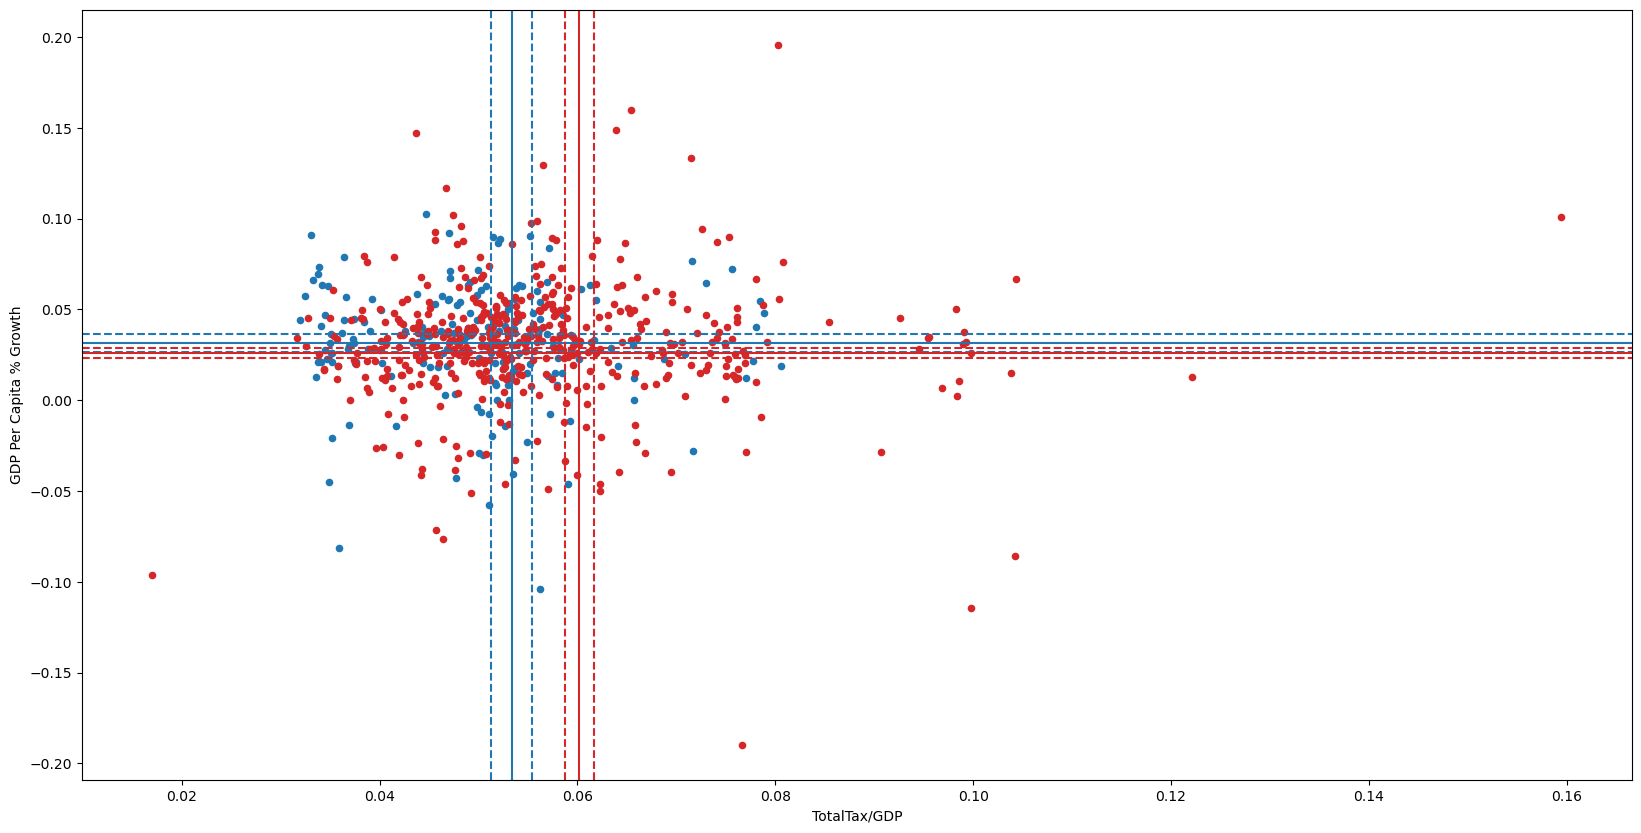

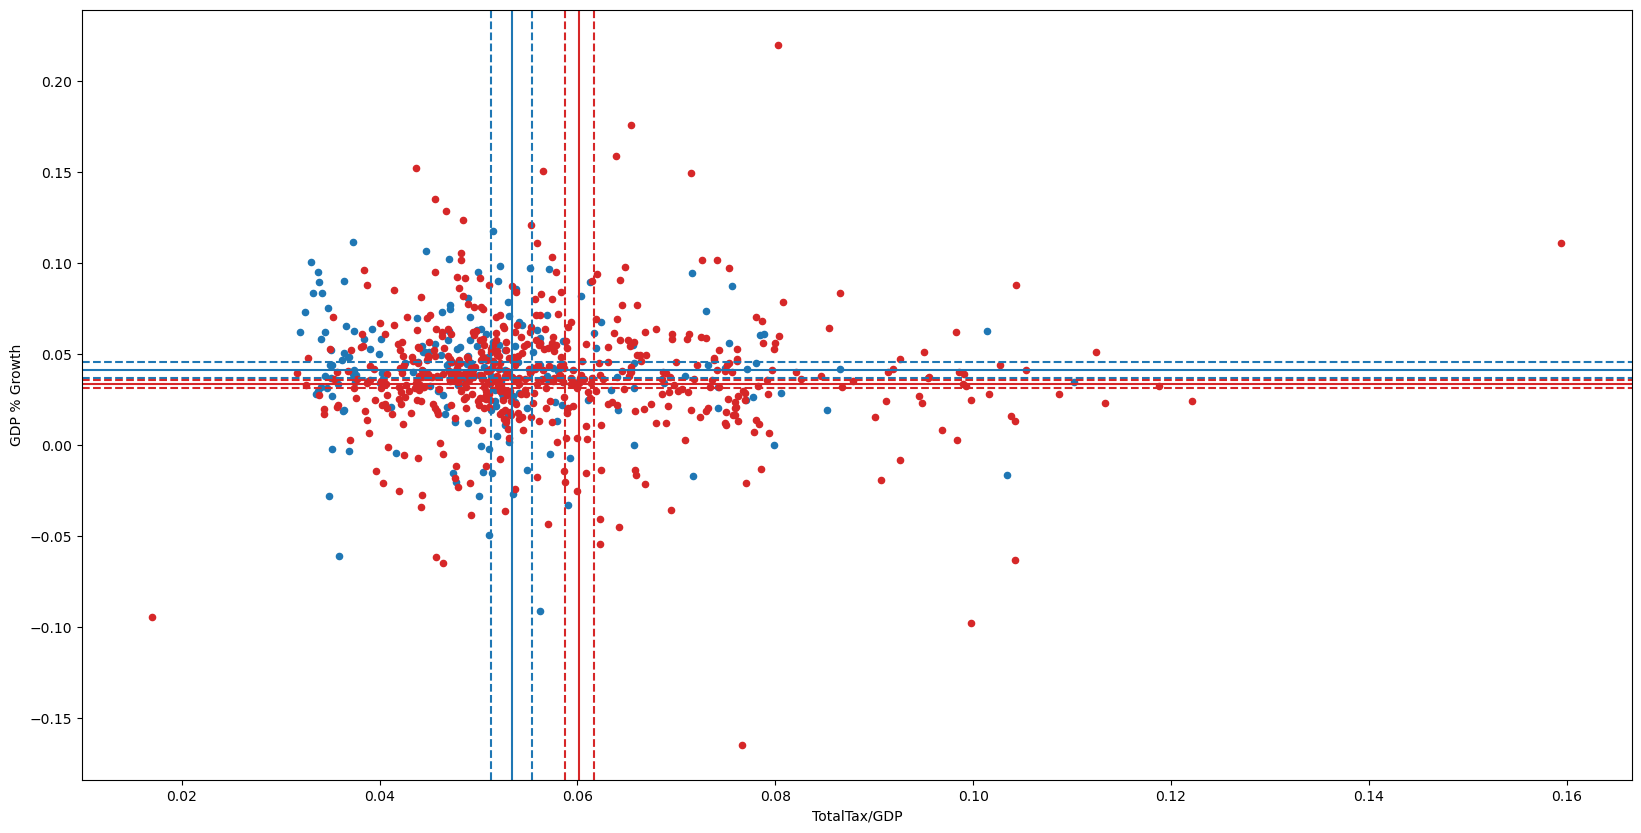

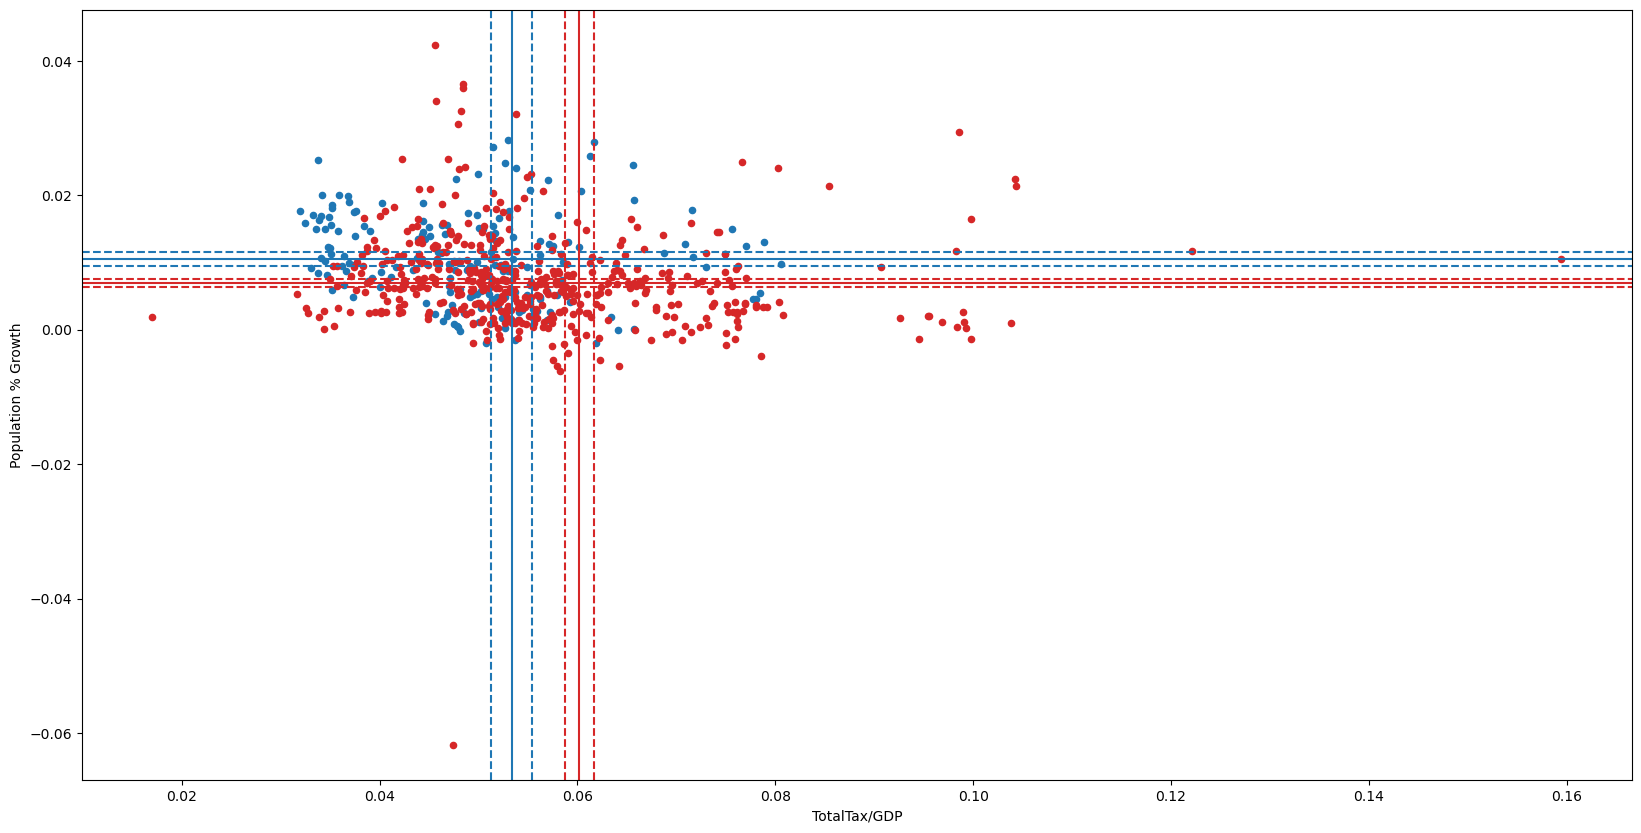

In [52]:
import matplotlib.pyplot as plt
no_prop_tax = panel[panel["T01"]==0]
prop_tax = panel[panel["T01"]!=0]

for key in ("GDP Per Capita","GDP", "Population"):
    fig, ax = plt.subplots(figsize = (20,10))
    key = key + " % Growth"
    colors = ["C0", "C3"]
    for i, df in enumerate((no_prop_tax, prop_tax)):
        color = colors[i]
        df.plot.scatter(x = "TotalTax/GDP", y = key, color = color, ax = ax)
        
        
        mean_key = df.mean()[key]
        se_key = df.sem()[key]
        mean_tax_gdp = df.mean()["TotalTax/GDP"]
        se_tax_gdp = df.sem()["TotalTax/GDP"]
        
        
        ax.axhline(mean_key, color = color)
        ax.axhline(mean_key + se_key * 2, color = color, ls = "--")
        ax.axhline(mean_key - se_key * 2, color = color, ls = "--")
        
        ax.axvline(mean_tax_gdp, color = color)
        ax.axvline(mean_tax_gdp + se_tax_gdp * 2, color = color, ls = "--")        
        ax.axvline(mean_tax_gdp - se_tax_gdp * 2, color = color, ls = "--")
        

In [53]:
pct_gdp_panel = panel.apply(lambda x: x / panel["GDP"])
pct_gdp_panel.dropna()

,,EFW,GDP,Population,GDP Per Capita,Log GDP,GDP % Growth,Log Population,Population % Growth,Log GDP Per Capita,GDP Per Capita % Growth,...,T28,T29,T40,T41,T50,T51,T53,T99,TotalTax,TotalTax/GDP
State,Year,,,,,,,,,,,,,,,,,,,,,
AL,2003,0.000063,1.0,0.033616,0.000222,0.000088,3.333871e-07,0.000063,3.888590e-08,0.000025,2.945012e-07,...,0.000738,4.478638e-08,0.015194,0.001809,2.504230e-04,0.000342,0.000779,0.000000,0.047928,3.577522e-07
AK,2003,0.000256,1.0,0.020397,0.001542,0.000326,2.209528e-06,0.000204,2.958648e-07,0.000122,1.913663e-06,...,0.000285,8.062360e-05,0.000000,0.006514,3.844012e-05,0.000000,0.020159,0.000000,0.035256,1.109042e-06
AZ,2003,0.000044,1.0,0.028586,0.000181,0.000063,3.705631e-07,0.000045,1.085459e-07,0.000018,2.620172e-07,...,0.000335,6.157763e-05,0.010906,0.002020,5.024724e-04,0.000000,0.000076,0.000000,0.045119,2.340620e-07
AR,2003,0.000106,1.0,0.034797,0.000367,0.000144,7.246596e-07,0.000101,8.883972e-08,0.000043,6.358199e-07,...,0.000348,5.427405e-05,0.019516,0.002259,8.115694e-04,0.000275,0.000194,0.000090,0.065745,8.395932e-07
CA,2003,0.000005,1.0,0.023033,0.000028,0.000009,4.014720e-08,0.000007,7.105599e-09,0.000002,3.304160e-08,...,0.001745,2.263224e-06,0.021371,0.004445,6.089308e-04,0.000000,0.000008,0.000000,0.051768,3.382279e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VA,2015,0.000017,1.0,0.017269,0.000120,0.000027,8.707071e-08,0.000019,1.283391e-08,0.000008,7.423680e-08,...,0.000494,8.313197e-06,0.024568,0.001688,2.001937e-07,0.000714,0.000005,0.000227,0.042385,8.747658e-08
WA,2015,0.000017,1.0,0.015195,0.000140,0.000028,1.334259e-07,0.000019,3.271655e-08,0.000009,1.007094e-07,...,0.000662,3.502226e-04,0.000000,0.000000,3.186222e-04,0.001683,0.000093,0.000000,0.043766,9.278259e-08
WV,2015,0.000113,1.0,0.026030,0.000542,0.000158,-1.888060e-07,0.000106,-5.535453e-08,0.000052,-1.334515e-07,...,0.000140,5.305306e-05,0.027288,0.002665,0.000000e+00,0.000155,0.009445,0.000000,0.078598,1.109891e-06


<Axes: xlabel='Year'>

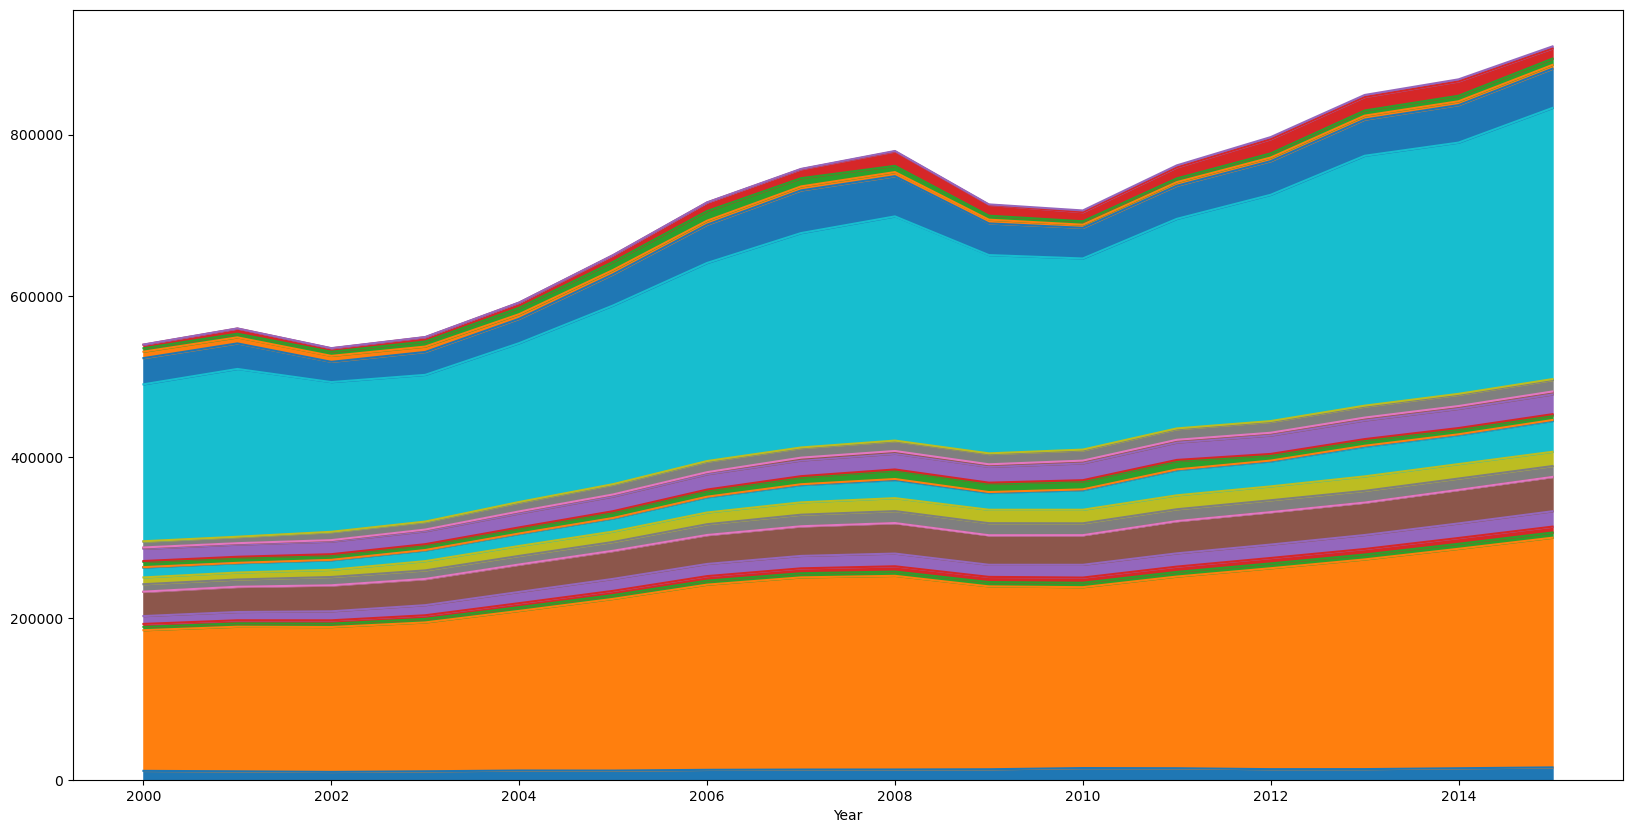

In [54]:
plot_df = panel.groupby("Year").sum().loc["2000":"2015"]
tax_names = list(code_dfs.keys())
fig, ax = plt.subplots(figsize = (20,10))
plot_df[tax_names[:-1]].plot.area(
    legend = False, 
    ax = ax)
# plot_df[tax_names[-1]].plot.line(ls = "--", 
#                                  linewidth = 5, 
#                                  color = "k",
#                                  ax = ax)

<Axes: xlabel='Year'>

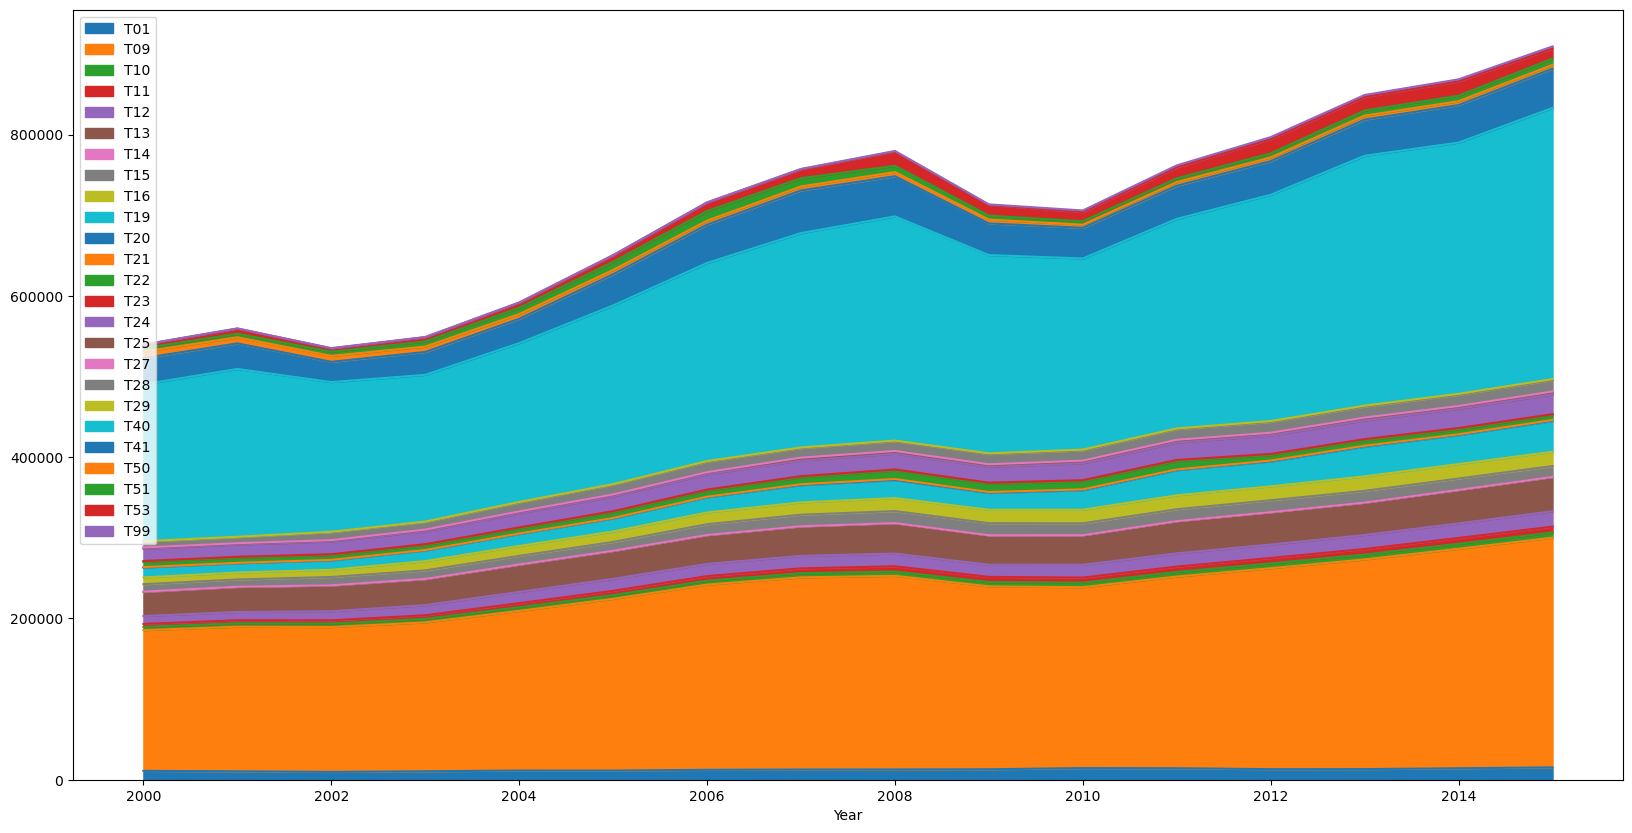

In [55]:
fig, ax = plt.subplots(figsize = (20,10))
plot_df[tax_names[:-1]].plot.area(
    legend = True, 
    ax = ax)
